In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
final_merged = pd.read_csv('final_combined_df.csv', index_col=0)

## EDA

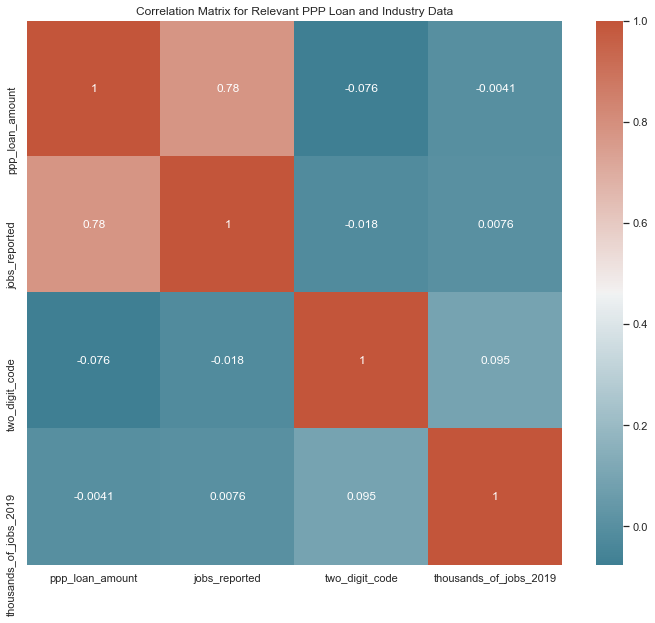

In [4]:
# calculate correlation matrix for relevant ppp/industry data
sns.set(rc={'figure.figsize':(12,10)})
corr = final_merged[['ppp_loan_amount', 'jobs_reported', 'two_digit_code', 'thousands_of_jobs_2019']].corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Correlation Matrix for Relevant PPP Loan and Industry Data')
plt.show()

Description/Observations:
- Fields: 
- thousands_of_jobs_2019: number of employees per industry sector in 2019 
- two_digit_code: two digit NAICS code representing each industry sector 
- jobs_reported: number of employees in each business 
- ppp_loan_amount: PPP Loan received for each business
-------
- This correlation matrix shows how correlated the PPP Loan and Industry data are to each other by displaying the correlation for each pair of columns. The squares are shaded according to the correlation value, with higher correlations shaded red and lower correlations shaded blue.
- From the matrix, it seems that jobs reported and PPP loan amount have the highest correlation (r=0.78) compared to the rest of the fields.

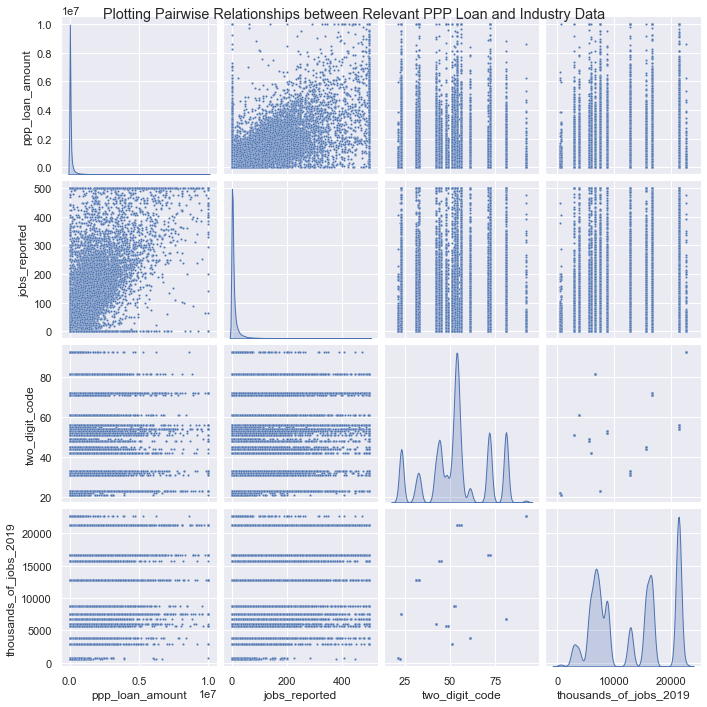

In [5]:
#create pairplots for relevant ppp/industry data
g=sns.pairplot(final_merged[['ppp_loan_amount', 'jobs_reported', 'two_digit_code', 'thousands_of_jobs_2019']],diag_kind = 'kde',plot_kws={"s": 5})
g.fig.suptitle("Plotting Pairwise Relationships between Relevant PPP Loan and Industry Data")
plt.show()

Description/Observations:

- This plot displays scatterplots for each pair of relevant columns in the PPP loan and Industry datasets.
- We can see the positive trend between jobs reported and PPP loan amount that was also noted in the previous plot, but for the rest of the plots there seems to be no clear trends.


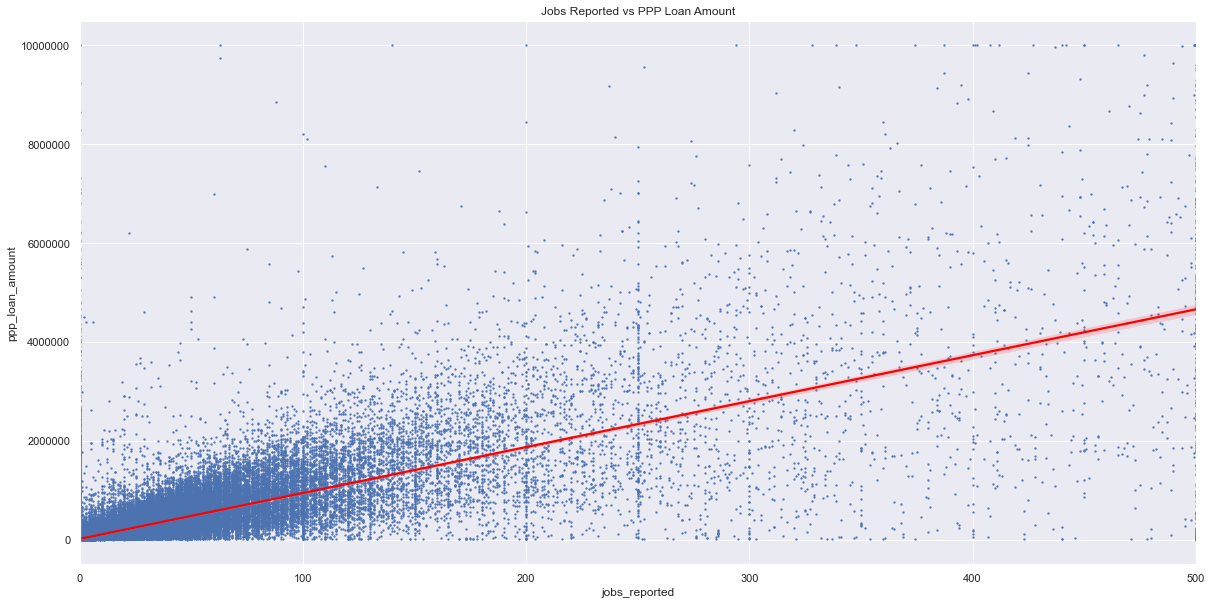

In [6]:
#zooming into loan amount and jobs reported variable (r=0.78) and plotting regression line
plt.figure(figsize=(20,10))
sns.regplot(x=final_merged['jobs_reported'],y=final_merged['ppp_loan_amount'],line_kws={'color': 'red'},scatter_kws={'s':2})
plt.title('Jobs Reported vs PPP Loan Amount')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Description/Observations:

- Here is a zoomed-in version of the scatterplot for jobs reported and ppp loan amount with a regression line showing the positive trend between the variables.
- We see that most of the businesses are concentrated below 100 jobs/employees and have ppp loan amounts under 2 million.
- From this plot, we can see that there is a slight upwards trend, where the amount of ppp loans allocated can increase as the number of employees increase.

In [8]:
#number of employees per industry in thousands
job_counts=final_merged.groupby(['general_industry_title'])['thousands_of_jobs_2019'].mean()
#total loan amount per industry
loan_industry=final_merged.groupby('general_industry_title')['ppp_loan_amount'].sum()
#counts of each industry in dataset
industry_counts=final_merged['general_industry_title'].value_counts()

In [9]:
#function to normalize data so we can graph multiple charts w/different y-axis in one 
def norm(df):
    return (df-df.min())/(df.max()-df.min())

In [10]:
norm(job_counts)

general_industry_title
construction                           0.314836
educational services                   0.145805
financial activities                   0.371689
information                            0.104764
leisure and hospitality                0.726731
manufacturing                          0.557306
mining                                 0.006149
other services                         0.279540
professional and business services     0.941537
public administration                  1.000000
retail trade                           0.684484
transportation and warehousing         0.229856
utilities                              0.000000
wholesale trade                        0.242792
Name: thousands_of_jobs_2019, dtype: float64

In [11]:
norm(loan_industry)

general_industry_title
construction                           0.594791
educational services                   0.121090
financial activities                   0.287649
information                            0.139739
leisure and hospitality                0.561316
manufacturing                          0.520613
mining                                 0.000576
other services                         0.272876
professional and business services     1.000000
public administration                  0.004111
retail trade                           0.366902
transportation and warehousing         0.137588
utilities                              0.000000
wholesale trade                        0.298389
Name: ppp_loan_amount, dtype: float64

In [12]:
norm(industry_counts)

professional and business services     1.000000
leisure and hospitality                0.529912
other services                         0.496832
retail trade                           0.435621
financial activities                   0.425485
construction                           0.369305
manufacturing                          0.258001
wholesale trade                        0.209001
transportation and warehousing         0.179309
information                            0.122367
educational services                   0.096862
public administration                  0.007024
utilities                              0.002718
mining                                 0.000000
Name: general_industry_title, dtype: float64

Text(0.5, 1.0, 'Plotting Industry and PPP Data')

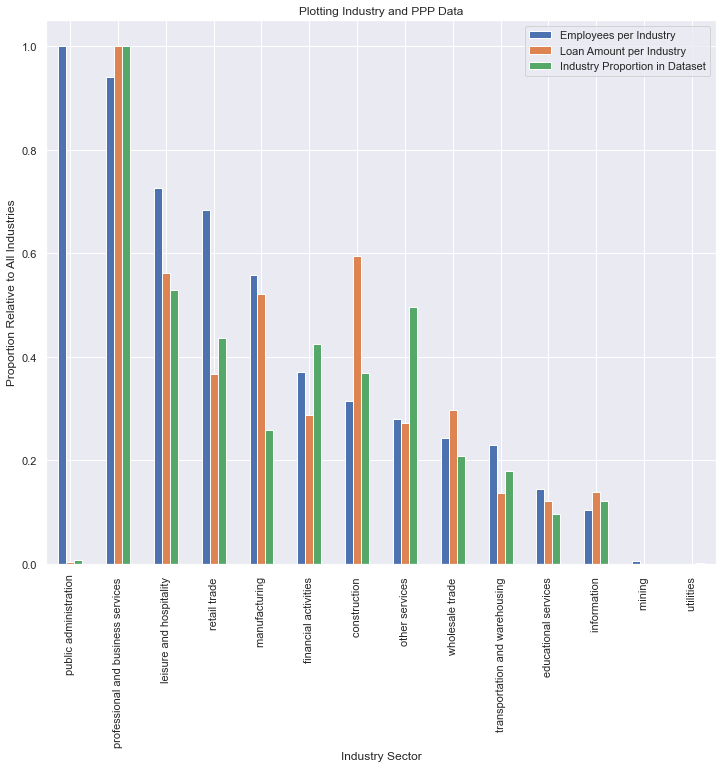

In [13]:
df = pd.DataFrame({'Employees per Industry': norm(job_counts),
                   'Loan Amount per Industry': norm(loan_industry),
                  'Industry Proportion in Dataset':norm(industry_counts)}, index=norm(industry_counts).index).sort_values(by='Employees per Industry', ascending=False)

df.plot.bar(rot=90, figsize=(12,10))
plt.xlabel('Industry Sector')
plt.ylabel('Proportion Relative to All Industries')
plt.title('Plotting Industry and PPP Data')

Description/Observation:

- This barplot shows three different variables: the blue represents the number of employees per industry relative to other industries, the orange represents the total ppp loan amount distributed to each industry relative to other industries, the green represents the number of times each industry is seen in the ppp loan dataset relative to other industries.
- We see that public administration has the highest number of employees per industry, and mining and utilites with the least amount of employees. 
- In addition, professional and business services received the highest amount of ppp loans and is represented the most in the dataset.

In [14]:
#get number of employees per industry *1000 since it's currently in thousands 
jobs_per_industry = final_merged.groupby('general_industry_title')['thousands_of_jobs_2019'].mean()*1000

In [15]:
#get total loan amount per industry
total_loan_per_industry=final_merged.groupby('general_industry_title')['ppp_loan_amount'].sum()

In [16]:
total_loan_per_industry.index=total_loan_per_industry.index.sort_values()

In [17]:
jobs_per_industry.index=jobs_per_industry.index.sort_values()

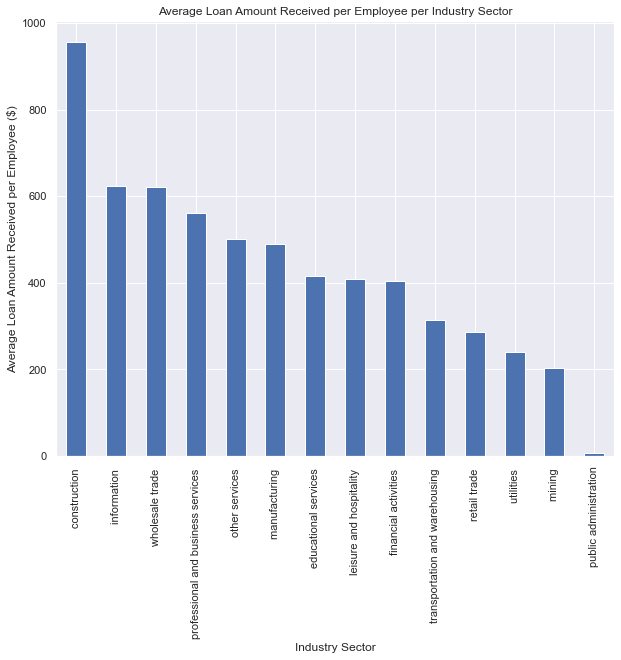

In [18]:
plt.figure(figsize=(10,8))
(total_loan_per_industry/jobs_per_industry).sort_values(ascending=False).plot.bar()
plt.xlabel('Industry Sector')
plt.ylabel('Average Loan Amount Received per Employee ($)')
plt.title('Average Loan Amount Received per Employee per Industry Sector')
plt.show()

Description/Observation:

- This barplot shows the average ppp loan amount received per employee per industry sector. 
- Construction has the highest average loan amount per employee, while public administration has the lowest despite having the highest number of employees, as seen in the previous plot. This is because state and local entities aren't eligible for PPP loans. Those entiites received assistance from a separate section of The CARES Act, and the select few public administration employees that were PPP beneficiaries worked in the private sector.
